In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing dataset

In [110]:
df = pd.read_csv("data/data.csv")
df.head()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good
3,19,Female,74,3.13,Moderate,Hot,Good
4,38,Male,77,2.11,Low,Normal,Poor


Inspecting the data

In [111]:
df.shape

(30000, 7)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [113]:
df.nunique()

Age                             52
Gender                           2
Weight (kg)                     65
Daily Water Intake (liters)    390
Physical Activity Level          3
Weather                          3
Hydration Level                  2
dtype: int64

In [114]:
df.describe()

,Age,Weight (kg),Daily Water Intake (liters)
count,30000.000000,30000.00000,30000.000000
mean,43.467667,76.84860,2.852444
std,14.998940,18.74494,0.835537
min,18.000000,45.00000,1.500000
25%,30.000000,61.00000,2.220000
50%,43.000000,77.00000,2.830000
75%,56.000000,93.00000,3.440000
max,69.000000,109.00000,5.430000


In [115]:
df.dtypes

Age                              int64
Gender                          object
Weight (kg)                      int64
Daily Water Intake (liters)    float64
Physical Activity Level         object
Weather                         object
Hydration Level                 object
dtype: object

In [116]:
numerical_cols = [col for col in df.columns if df.dtypes[col] != "object"]
print(f"numerical_cols: {numerical_cols}")
categorical_cols = [col for col in df.columns if df.dtypes[col] == "object"]
print(f"categorical_cols: {categorical_cols}")

numerical_cols: ['Age', 'Weight (kg)', 'Daily Water Intake (liters)']
categorical_cols: ['Gender', 'Physical Activity Level', 'Weather', 'Hydration Level']


Missing Values

In [117]:
df.isna().sum()

Age                            0
Gender                         0
Weight (kg)                    0
Daily Water Intake (liters)    0
Physical Activity Level        0
Weather                        0
Hydration Level                0
dtype: int64

**Data Visvulization**

*Univariate Analysis*

Histograms

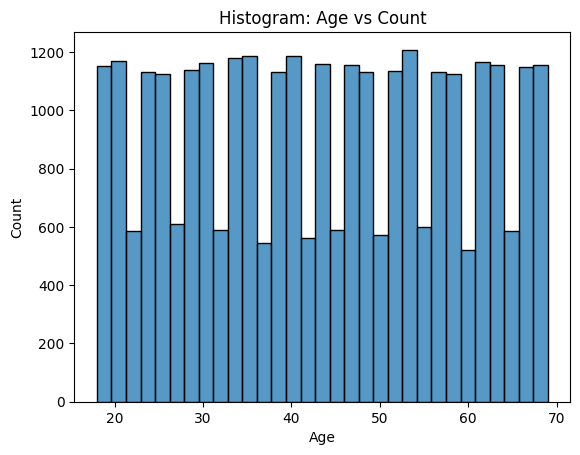

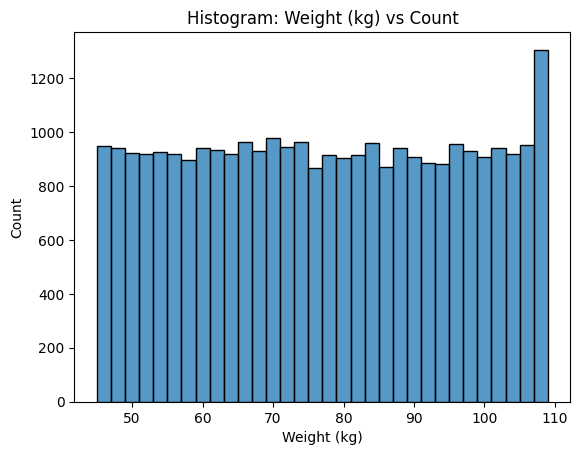

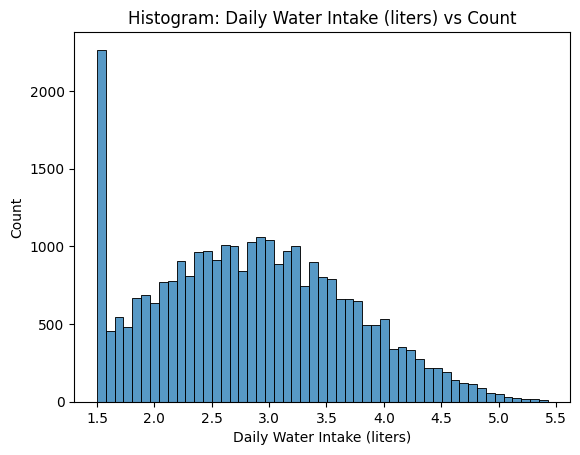

In [118]:
for n_col in numerical_cols:
    sns.histplot(df.loc[:,n_col])
    plt.title(f"Histogram: {n_col} vs Count")
    plt.show()

*Bivariate Analysis*

Box Plots

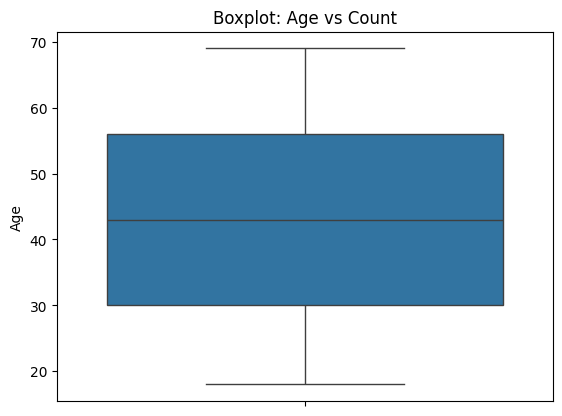

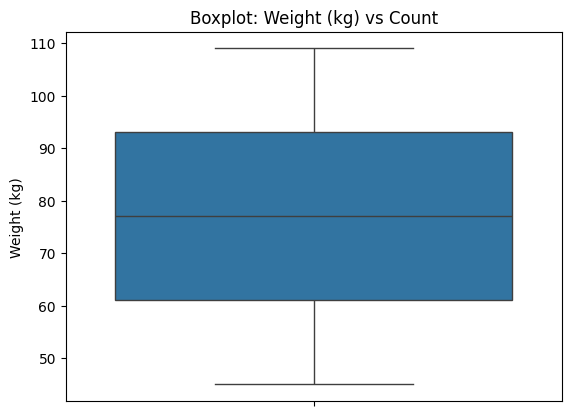

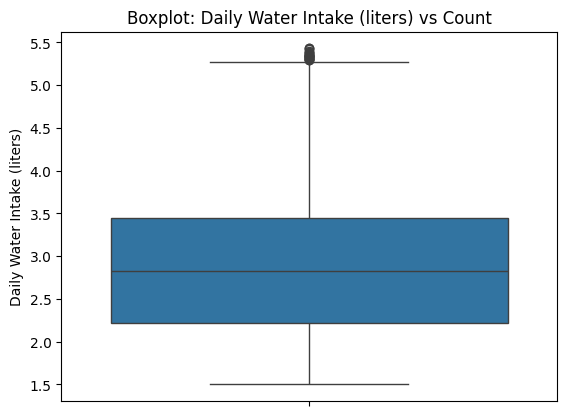

In [119]:
for n_col in numerical_cols:
    sns.boxplot(df.loc[:,n_col])
    plt.title(f"Boxplot: {n_col} vs Count")
    plt.show()

Scatter plots

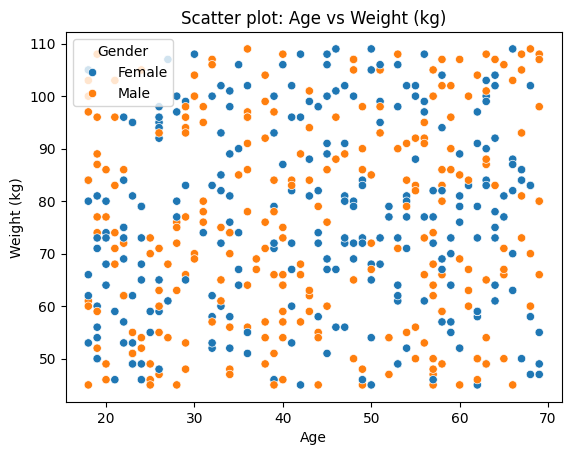

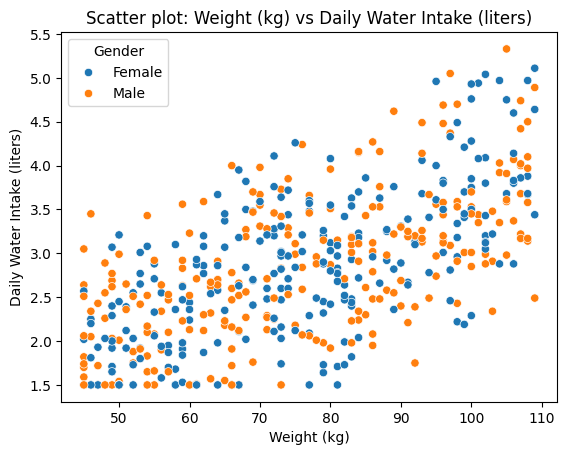

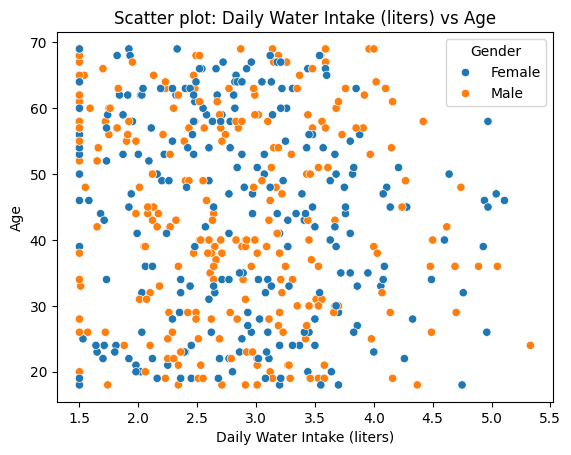

In [120]:
import random

random_row = random.randint(0,df.shape[0]+1)
random_df = df.loc[random_row:random_row+500]
n_count = len(numerical_cols)

for i in range(len(numerical_cols)):
    col_1 = numerical_cols[i%n_count]
    col_2 = numerical_cols[(i+1)%n_count]
    sns.scatterplot(data = random_df,x=col_1,y=col_2,hue="Gender")
    plt.title(f"Scatter plot: {col_1} vs {col_2}")
    plt.show()

**Multivariate Analysis**

*Heatmap*

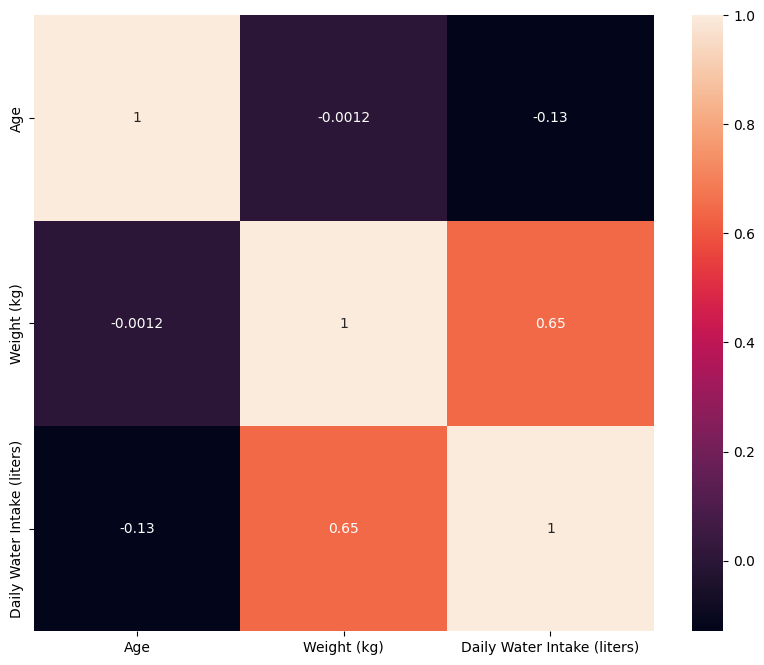

In [121]:
corr = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

pairplots

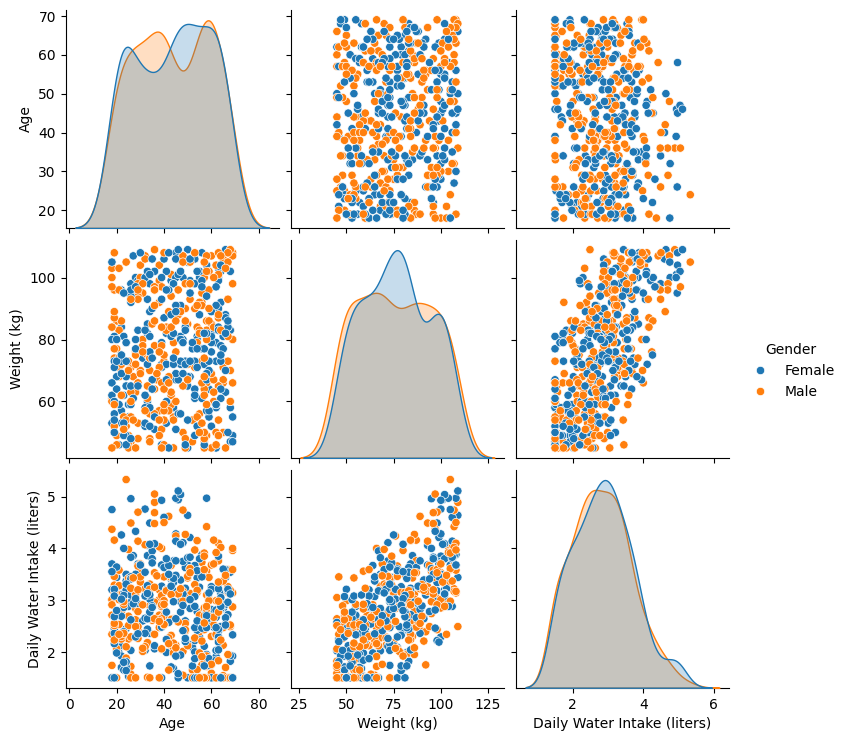

In [122]:
sns.pairplot(data=random_df,hue="Gender")
plt.show()